In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [157]:
def function(x, y, l):
    return x * x + l * y * y - x * y - x - y

def gradientFunction(x, y, l):
    dx = 2 * x - y - 1
    dy = 2 * l * y - x - 1
    return (dx, dy)

In [174]:
class GradientDescent2D:
    def __init__(self, f, gradF, stepSize, l):
        
        # Init Functions
        self.f = f
        self.gradF = gradF
        self.stepSize = stepSize
        self.stopVal = 0.000001
        self.l = l
        
        self.x = 0
        self.y = 0
    
    def moveOneStep(self):
        grad = self.gradF(self.x, self.y, self.l)
        self.x -= self.stepSize * grad[0]
        self.y -= self.stepSize * grad[1]
        
    def diffGrad(self, a, b):
        try:
            return ((a[0] - b[0]) ** 2  + (a[1] - b[1]) ** 2) ** (0.5)
        except:
            return 0
        
    def descent(self):
        
        Error = []
        
        while True:
            
            prevF = self.f(self.x, self.y, self.l)
            prevGrad = self.gradF(self.x, self.y, self.l)
            self.moveOneStep()
            currF = self.f(self.x, self.y, self.l)
            currGrad = self.gradF(self.x, self.y, self.l)
            
            Error.append(abs(prevF - currF))
            
            if self.diffGrad(prevGrad, currGrad) < self.stopVal:
                break
            
            if len(Error) > 1e5:
                # Taking Too Long to converge
                break
        
        return Error
    
    def getPoint(self):
        return (self.x, self.y)

In [159]:
gradientDescent = GradientDescent2D(function, gradientFunction, 0.1, 1)
print(gradientDescent.getPoint())

(0, 0)


In [160]:
Error = gradientDescent.descent()
print(gradientDescent.getPoint())

(0.9999939236039033, 0.9999939236039033)


In [161]:
iteration = np.linspace(1, len(Error), len(Error))

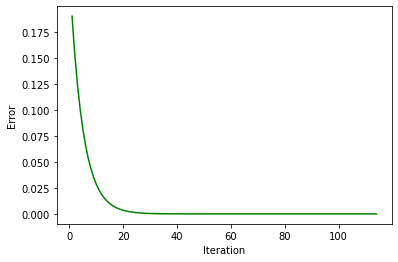

In [162]:
plt.plot(iteration, Error, 'g')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

In [154]:
stepSizes = [np.random.uniform(0.1, 2) for i in range(20)]
stepSizes.sort()

In [163]:
iterationReq = []

for step in stepSizes:
    gradientDescent = GradientDescent2D(function, gradientFunction, step, 1)
    error = gradientDescent.descent()
    iterationReq.append(len(error))

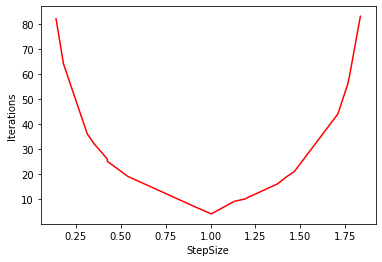

In [164]:
plt.plot(stepSizes, iterationReq, 'r')
plt.xlabel('StepSize')
plt.ylabel('Iterations')
plt.show()

In [175]:
gamma = np.linspace(0.5, 1, 5)
iterationRequired = []

for l in gamma:
    gradientDescent = GradientDescent2D(function, gradientFunction, 0.1, l)
    error = gradientDescent.descent()
    iterationRequired.append(len(error))

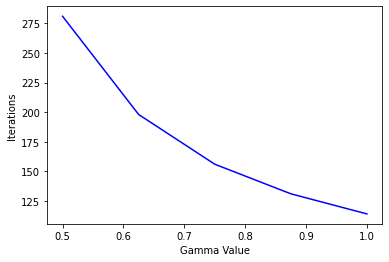

In [177]:
plt.plot(gamma, iterationRequired, 'b')
plt.xlabel('Gamma Value')
plt.ylabel('Iterations')
plt.show()

# Part 2

In [180]:
gradientDescent = GradientDescent2D(function, gradientFunction, 0.1, -1)
Error = gradientDescent.descent()
iteration = np.linspace(1, len(Error), len(Error))

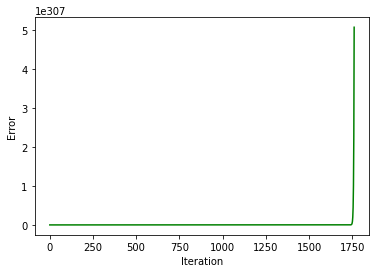

In [181]:
plt.plot(iteration, Error, 'g')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

#### Observe that nature of the function at $\gamma = -1$

In [182]:
# Check if semi-definate for each gamma, create a check semi definate function